In [10]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# Data Preparation

In [17]:
# load xlsx file into dataframe and get overview of it
df = pd.read_excel('stock_data.xlsx')
print("Shape of data is ", df.shape)
df.head()

Shape of data is  (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### handling missing data

In [13]:
def check_missing_value(file,file_name=''):
    print('The total number of record: ',len(file))
    print('---------------- Checking Missing Value For ' + file_name + ' ----------------')
    missing_count = file.isna().sum()
    missing_percent = (missing_count / len(file)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing %': missing_percent
    })
    print(missing_df)
    print('\n')

In [18]:
check_missing_value(df, "Sales_Data")

The total number of record:  541909
---------------- Checking Missing Value For Sales_Data ----------------
             Missing Count  Missing %
InvoiceNo                0   0.000000
StockCode                0   0.000000
Description           1454   0.268311
Quantity                 0   0.000000
InvoiceDate              0   0.000000
UnitPrice                0   0.000000
CustomerID          135080  24.926694
Country                  0   0.000000




In [19]:
# Excluding null data
df_not_nan = df[df['CustomerID'].notna()]
df_not_nan = df_not_nan.sample(10000, random_state=42)
df_not_nan.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
234751,557598,22558,CLOTHES PEGS RETROSPOT PACK 24,2,2011-06-21 11:33:00,1.65,14667.0,United Kingdom
283269,561704,21533,RETROSPOT LARGE MILK JUG,1,2011-07-29 11:07:00,4.95,14606.0,United Kingdom
532936,581001,22726,ALARM CLOCK BAKELIKE GREEN,24,2011-12-07 08:07:00,3.75,12583.0,France
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,2011-02-01 13:25:00,8.50,15311.0,United Kingdom
424855,573287,21314,SMALL GLASS HEART TRINKET POT,8,2011-10-28 14:42:00,2.10,14194.0,United Kingdom


In [20]:
# Tinh toan RFM

# -------- Tinh R - Recency

# Chuyen tu string -> date
df_not_nan['InvoiceDate'] =  pd.to_datetime(df_not_nan['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# Lay ngay lon nhat trong InvoiceDate + 1
import datetime
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days=1)

# -------- Tinh M - MoneytaryValue
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

# Group by CustomerID de tinh R, F, M

df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date- x.max()).days,
     'InvoiceNo':'count',
     'TotalPay':'sum'
     }
)

In [23]:
df_customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30


In [24]:
df_customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPay':'MonetaryValue'}, inplace=True)

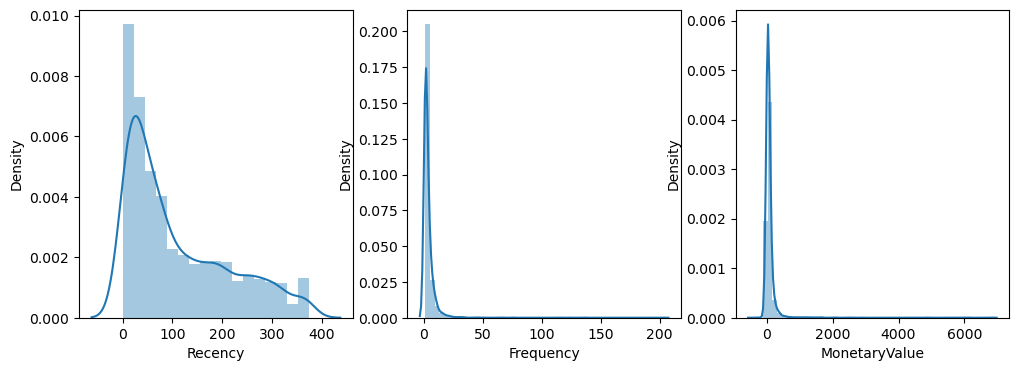

In [25]:
# Ve phan phoi de kiem tra

fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_customers['Recency'], ax = ax[0])
sns.distplot(df_customers['Frequency'], ax = ax[1])
sns.distplot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

In [26]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

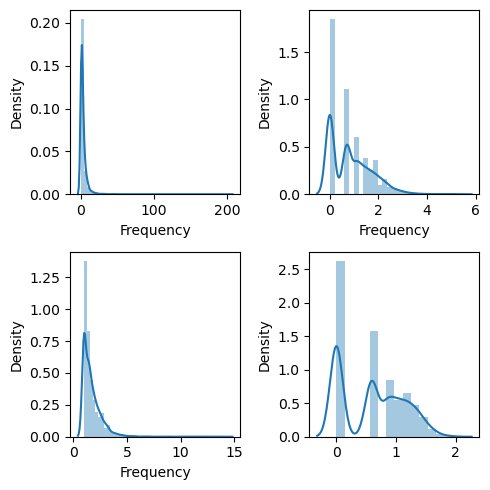

14.77
0.85
3.67
0.16


In [27]:
analyze_skewness('Frequency')

In [28]:
# Tien hanh transform du lieu

df_customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30


In [29]:
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values
df_customers_t.head(10)

,Recency,Frequency,MonetaryValue
0,6.285050,1.127547,5.107026
1,12.822038,0.591193,4.944452
2,4.514540,0.591193,6.787853
3,8.093846,1.127547,4.324076
4,12.507538,0.591193,3.217225
5,5.842330,1.017445,6.681810
6,10.722280,0.000000,4.308869
7,7.368815,0.857267,3.794637
8,9.629931,0.857267,3.220442
9,6.617486,0.000000,2.571282


In [30]:

# Tien hanh scale du lieu

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)

In [31]:
pd.DataFrame(df_customers_t).head()

,0,1,2
0,-0.496913,1.012426,1.017503
1,1.234593,-0.017412,0.925115
2,-0.965883,-0.017412,1.972690
3,-0.017802,1.012426,0.572565
4,1.151289,-0.017412,-0.056441


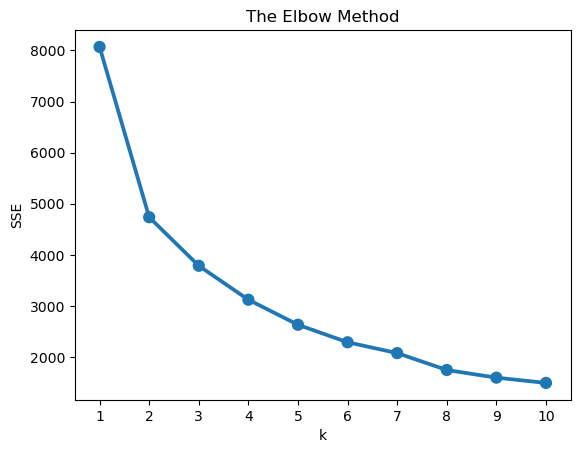

In [32]:
# Dua du lieu vao KNN

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [33]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_customers_t)

KMeans(n_clusters=3, random_state=42)

In [34]:
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,39,5,133.20,0
12348.0,249,2,120.88,1
12349.0,19,2,312.75,0
12352.0,72,5,80.85,0
12354.0,232,2,33.30,1


In [35]:
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,45.45,7.65,163.90
1,226.64,1.65,28.79
2,47.18,1.58,21.29
